In [10]:
import pandas as pd
df = pd.read_csv('data/en.yusufali.csv',dtype="object")
df.head()

Surah Ayah                                               Text
0     1    1  In the name of Allah, Most Gracious, Most Merc...
1     1    2  Praise be to Allah, the Cherisher and Sustaine...
2     1    3                      Most Gracious, Most Merciful;
3     1    4                     Master of the Day of Judgment.
4     1    5         Thee do we worship, and Thine aid we seek.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Surah   6236 non-null   object
 1   Ayah    6236 non-null   object
 2   Text    6236 non-null   object
dtypes: object(3)
memory usage: 146.3+ KB


In [12]:
df.shape

(6236, 3)

In [13]:
import neattext as nt

In [14]:
import string

class TextFrame:
    def __init__(self, text):
        self.text = text

    def remove_punctuations(self):
        translator = str.maketrans('', '', string.punctuation)
        self.text = self.text.translate(translator)
        return self.text

# Example usage
sent = TextFrame("Hello, world! This is a test.")
s = sent.remove_punctuations()
print(s)  # Output: "Hello world This is a test"

Hello world This is a test


In [15]:
s = ' '.join(df['Text'])
sent = nt.TextFrame(s)
s = sent.remove_special_characters()
sent.describe()

Key      Value          
Length  : 862103         
vowels  : 262333         
consonants: 432266         
stopwords: 103244         
punctuations: 0              
special_char: 0              
tokens(whitespace): 167285         
tokens(words): 167285         


In [16]:
sent.count_stopwords()

{'in': 3083,
 'the': 7975,
 'name': 43,
 'of': 5098,
 'most': 368,
 'be': 1422,
 'to': 4511,
 'and': 6844,
 'do': 773,
 'we': 1882,
 'show': 85,
 'us': 472,
 'those': 1402,
 'on': 1046,
 'whom': 310,
 'whose': 101,
 'is': 2964,
 'not': 1569,
 'who': 1973,
 'go': 72,
 'a': 2442,
 'm': 7,
 'this': 662,
 'it': 1590,
 'without': 119,
 'are': 1173,
 'out': 309,
 'what': 666,
 'have': 1183,
 'for': 2345,
 'them': 2176,
 'before': 359,
 'their': 1598,
 'hereafter': 118,
 'they': 2917,
 'from': 1206,
 'these': 142,
 'will': 1968,
 'as': 822,
 'same': 31,
 'whether': 56,
 'or': 634,
 'there': 518,
 'some': 204,
 'say': 775,
 'last': 40,
 'but': 1699,
 'really': 26,
 'would': 289,
 'only': 207,
 'themselves': 161,
 'has': 443,
 'because': 114,
 'when': 690,
 'make': 195,
 'why': 77,
 'others': 83,
 'alone': 44,
 'with': 1263,
 'you': 1452,
 'were': 415,
 'back': 194,
 'give': 246,
 'so': 542,
 'that': 2326,
 'all': 932,
 'around': 9,
 'him': 1032,
 'could': 92,
 'see': 239,
 'another': 100,
 'ke

In [17]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
from PIL import Image

In [18]:
def plot_wordcloud(data,color) :
    plt.figure(figsize=(10, 10))
    wc = WordCloud(width=800, height=400, background_color=color , stopwords=STOPWORDS).generate(data)
    # mask = np.array(Image.open('cloud.png'))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()
# plot_wordcloud(s,'white')

In [19]:
sent = sent.remove_stopwords()


In [20]:
import neattext.functions as nfx

### Figure out the first 20 surah's wordcloud

In [21]:
import re
surah_verse_dict={}
surah_text={}
for i in range(1,20):
    surah_verse_dict[str(i)] = {}
    surah_text[str(i)] = ""
for i, row in df.iterrows():
    try:
        surah_verse_dict[row['Surah']][row['Ayah']]=row['Text'] 
        surah_text[row['Surah']] += row['Text']  + " "
    except:
        pass

Sarah 0 1


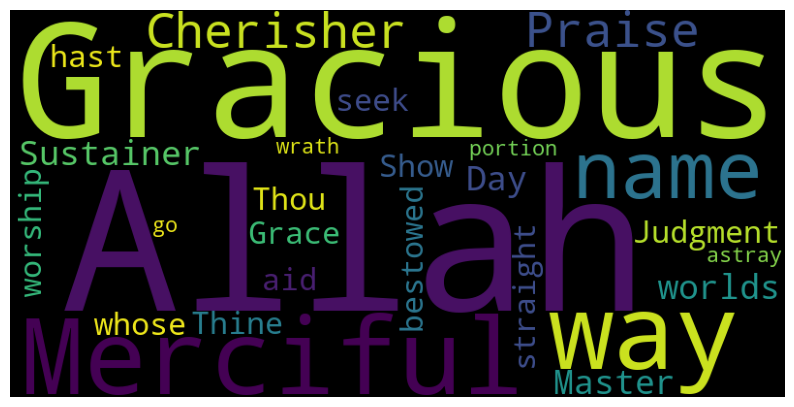

Sarah 0 2


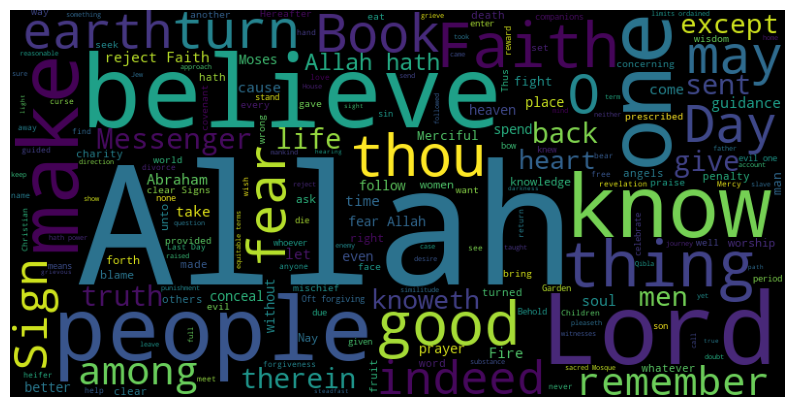

Sarah 0 3


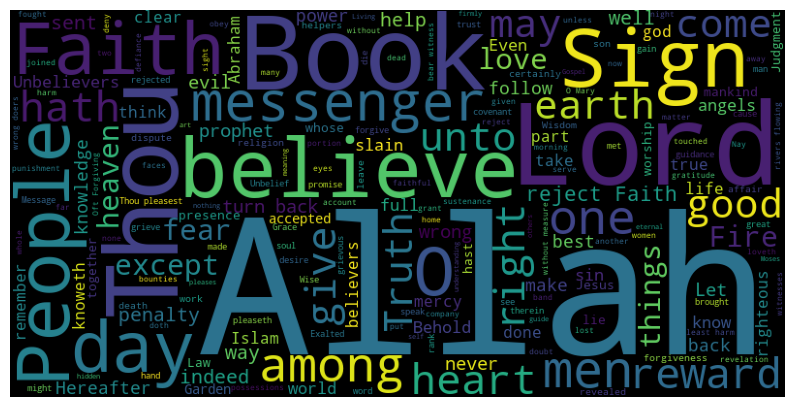

Sarah 0 4


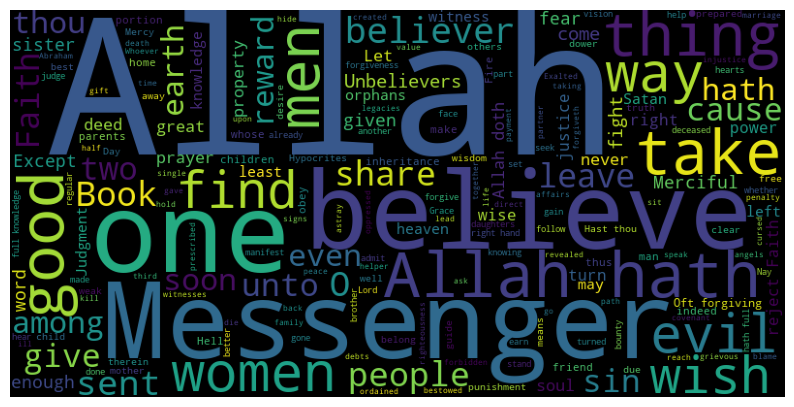

Sarah 0 5


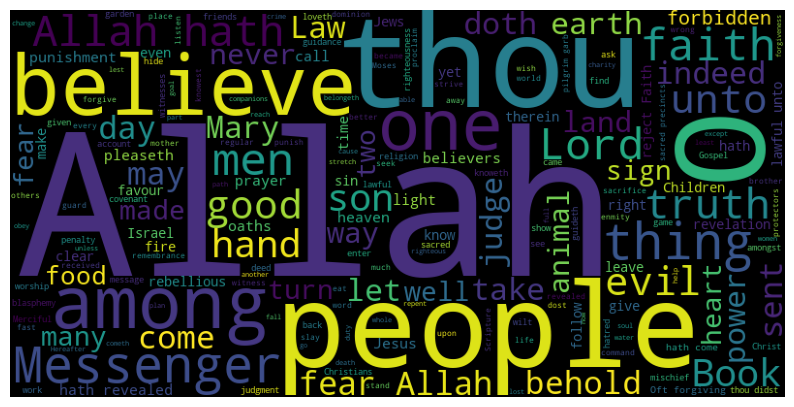

Sarah 0 6


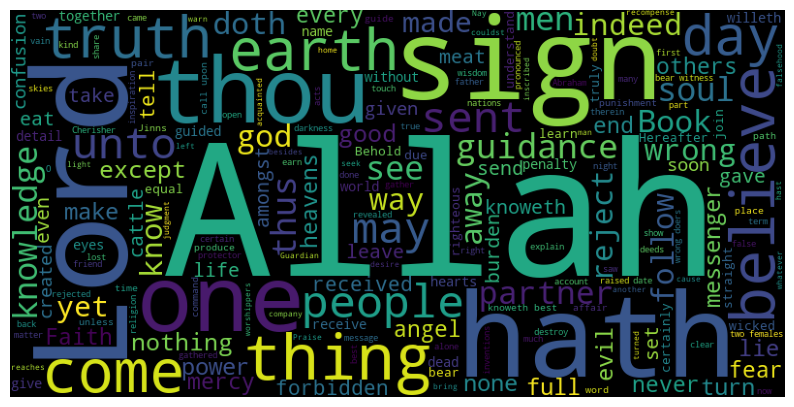

Sarah 0 7


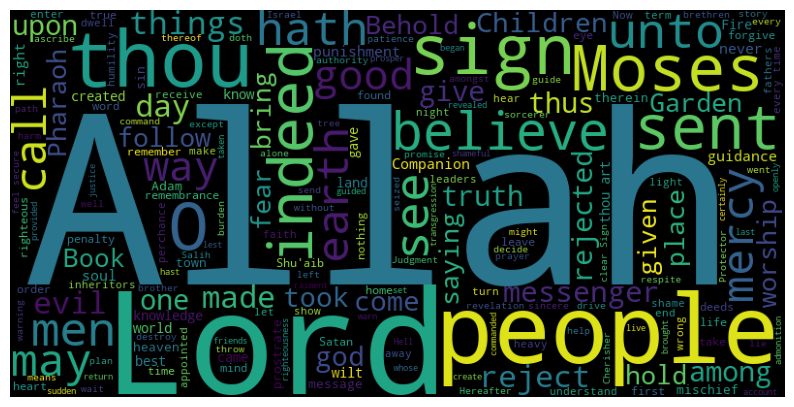

Sarah 0 8


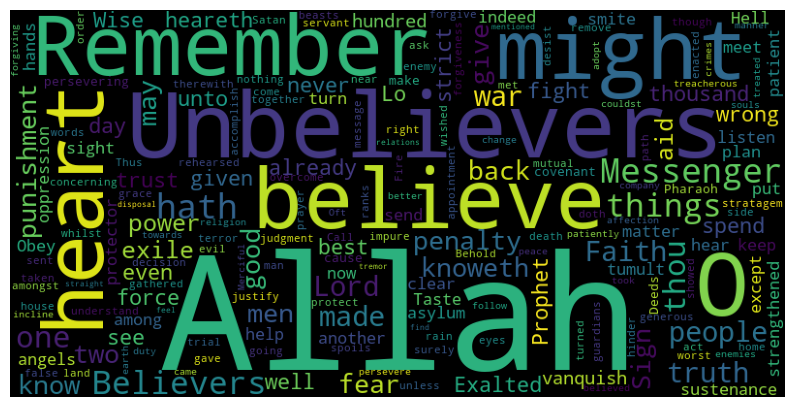

Sarah 0 9


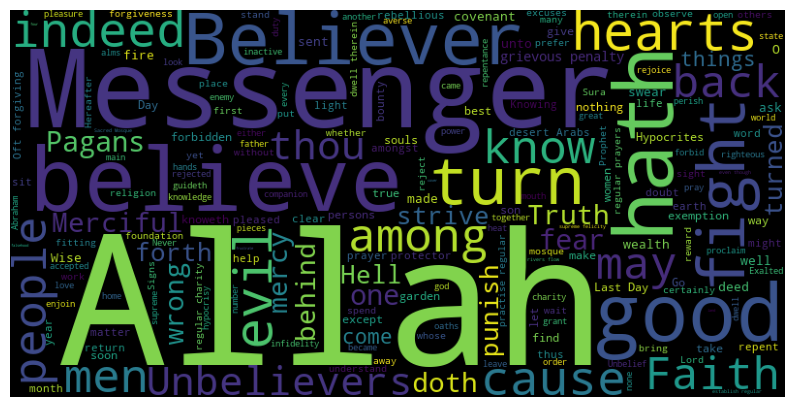

Sarah 0 10


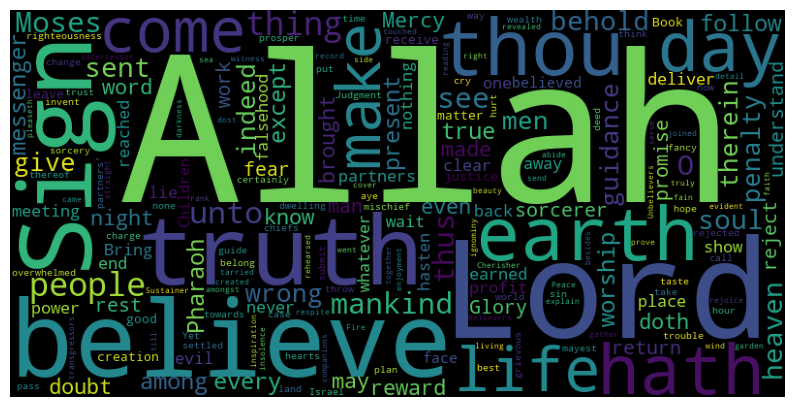

Sarah 0 11


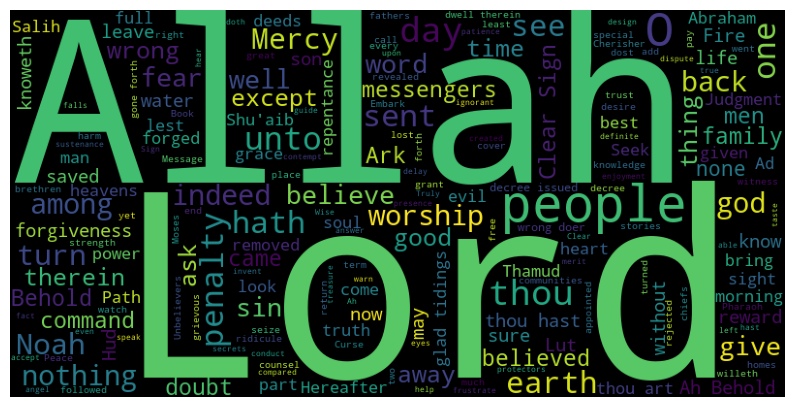

Sarah 0 12


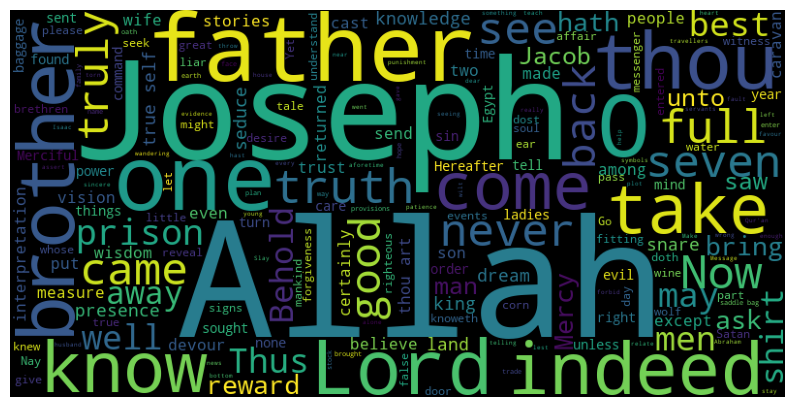

Sarah 0 13


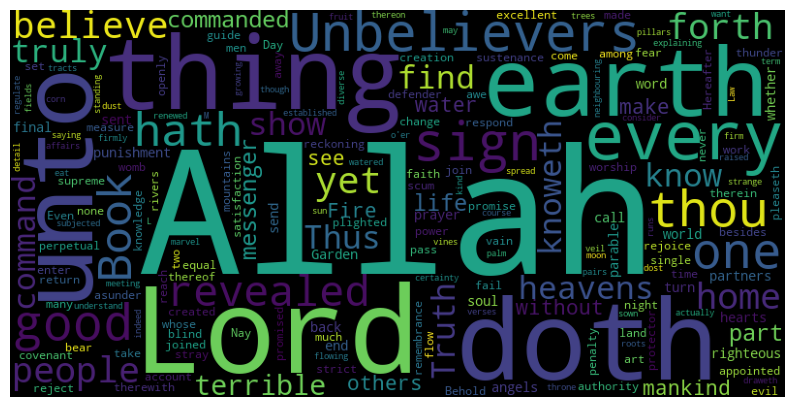

Sarah 0 14


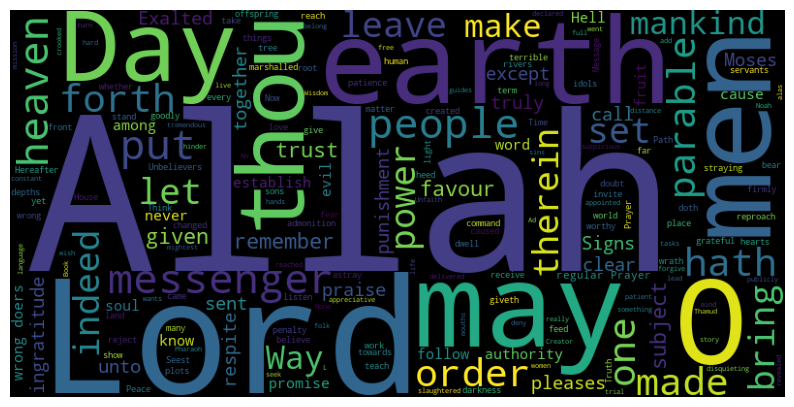

Sarah 0 15


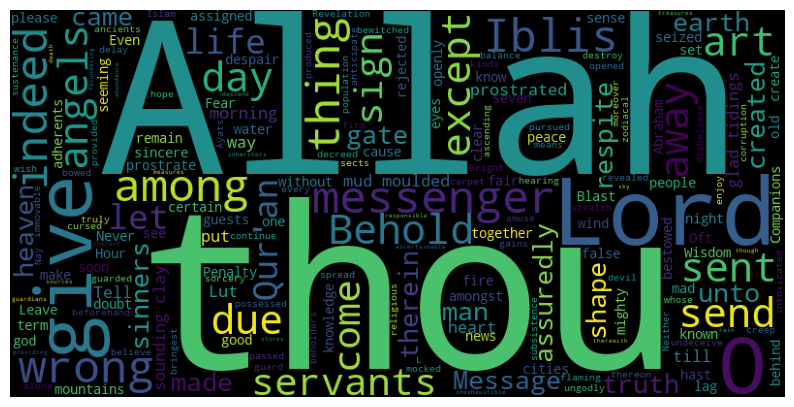

Sarah 0 16


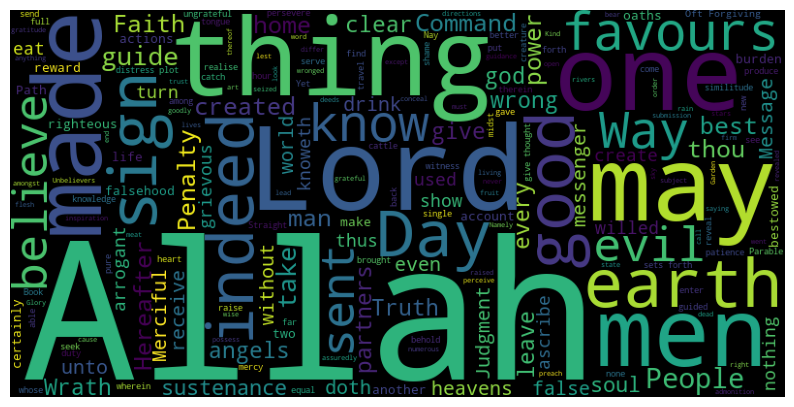

Sarah 0 17


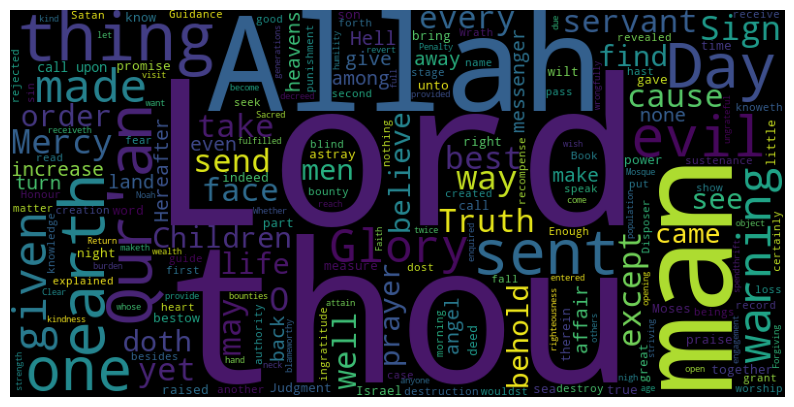

Sarah 0 18


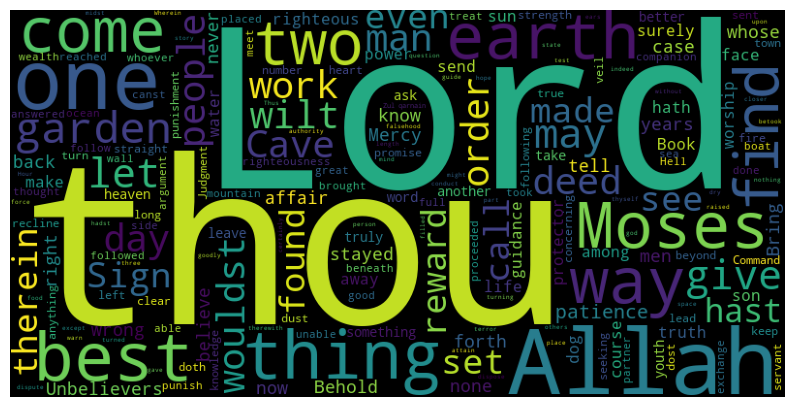

Sarah 0 19


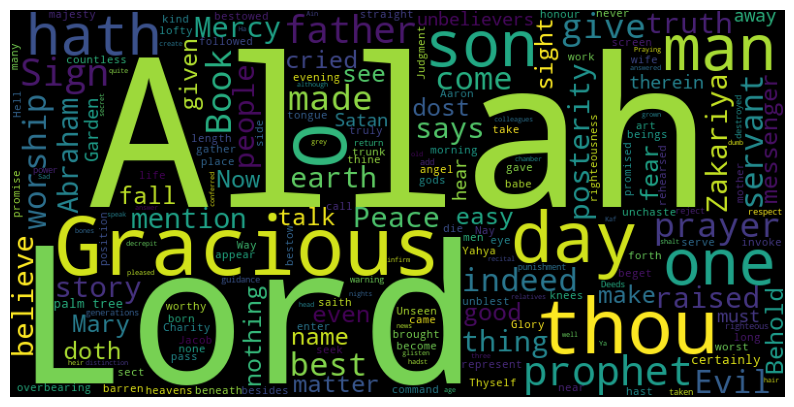

In [22]:
custom_stopwords = ['ye', 'verily', 'will', 'said', 'say', 'us', 'thy', 'thee']
for sw in custom_stopwords:
    STOPWORDS.add(sw);
for key in surah_text.keys():
    print("Sarah 0 " + key)
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color="black", width=800, height=400).generate(surah_text[key])
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()